In [12]:
import csv
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier

In [13]:
#Process the raw data, convert from days to years, separate header, add/remove features should be done from here
def preProcess(rawData):
    headers = rawData[0][0].split(";")[1:]
    
    for i in range(1, len(rawData)):
        line = rawData[i][0].split(";")
        processedData.append(line[1:])
        for j in range(1,len(processedData[i-1])):
            processedData[i-1][j] = math.trunc(float(processedData[i-1][j]))

    for i in range(len(processedData)):
        years = float(processedData[i][0]) / 365
        processedData[i][0] = math.trunc(years)
        
    return headers

Train Accuracy: 0.7582515991471215
Test Accuracy: 0.7071861471861471
- Confusion Matrix:


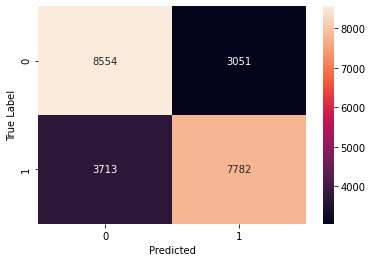

- Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72     11605
           1       0.72      0.68      0.70     11495

    accuracy                           0.71     23100
   macro avg       0.71      0.71      0.71     23100
weighted avg       0.71      0.71      0.71     23100



In [14]:

#### Please allow it to run for a few minutes! ####

rawData = [] #Hold all dataset raw in memory
processedData = []
#Load the dataset into the program and store it into a list
def loadData(path):
    with open(path) as f:
        reader = csv.reader(f)
        for line in reader:
            rawData.append(line)

loadData("cardio_train.csv")
#print(rawData[0][0])
#print(rawData[1])#

headers = preProcess(rawData)

#print(headers)
#print(processedData[1])
#Feature vector
features = [entry[:11]for entry in processedData]
#print(features[1])
#Labels for the entries
labels = [entry[11]for entry in processedData]
#print(labels[1])
#Feature + Label is the x-y pair needed for the model in order to start training
#The label is the risk factor 0 (No risk) or 1 (At risk)

#For the purpose of validation, ensuring that the model works well, the dataset will be split into training and testing (held out)
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33, random_state=10)
#features_train, features_val, labels_train, labels_val = train_test_split(features_train, labels_train, test_size=0.1, random_state=0)

# Uncomment this if you want to use standardized features with a deviation = 1 From my testing this performs similar or worse
#scaler = StandardScaler()
#features_train = scaler.fit_transform(features_train)
#features_val = scaler.fit_transform(features_val)
#features_test = scaler.fit_transform(features_test)

KNNClassifier = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
KNNClassifier.fit(features_train, labels_train)

labels_pred = KNNClassifier.predict(features_test)
print('Train Accuracy: '+ str(KNNClassifier.score(features_train, labels_train)))
print('Test Accuracy: ' + str(KNNClassifier.score(features_test, labels_test)))
print('- Confusion Matrix:')
matrix = confusion_matrix(labels_test, labels_pred)
sns.heatmap(matrix, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("True Label") 
plt.show()
print('- Report:')
print(classification_report(labels_test, labels_pred))


The AUC is: 0.7138019463647316


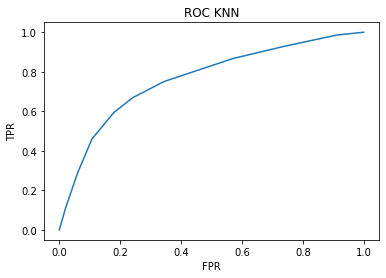

In [18]:
#ROC Metrics!
ROC_AUC = roc_auc_score(labels_test,KNNClassifier.predict(features_test))
print('The AUC is: ' + str(ROC_AUC))
fpr, tpr, thresholds = roc_curve(labels_test,KNNClassifier.predict_proba(features_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label = 'ROC Graph')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC KNN')
plt.show()

Train Accuracy: 0.7282089552238806
Test Accuracy: 0.7138961038961039
- Confusion Matrix:


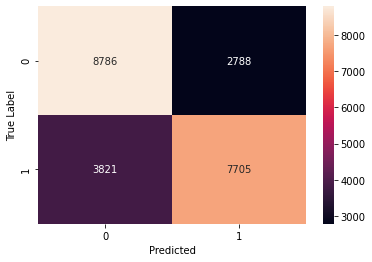

- Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73     11574
           1       0.73      0.67      0.70     11526

    accuracy                           0.71     23100
   macro avg       0.72      0.71      0.71     23100
weighted avg       0.72      0.71      0.71     23100



In [17]:
##Best subset run !

#print(headers)

#Header bit jsut to check indexes to be deleted!
headers2 = np.array(headers)
headers2 = np.delete(headers2,[1,2,3,7,8,9],None)

#This generates the best subset
bestfeatures = np.array(features)
bestfeatures = np.delete(bestfeatures,[1,2,3,7,8,9],1)
#print(headers2)
#print(features2)

features_train, features_test, labels_train, labels_test = train_test_split(bestfeatures, labels, test_size=0.33, random_state=0)
KNNClassifier = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
KNNClassifier.fit(features_train, labels_train)

labels_pred = KNNClassifier.predict(features_test)
print('Train Accuracy: '+ str(KNNClassifier.score(features_train, labels_train)))
print('Test Accuracy: ' + str(KNNClassifier.score(features_test, labels_test)))
print('- Confusion Matrix:')
matrix = confusion_matrix(labels_test, labels_pred)
sns.heatmap(matrix, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("True Label") 
plt.show()
print('- Report:')
print(classification_report(labels_test, labels_pred))

In [31]:
#KNN Validation, pick best hyperparamete (K value)
errorRates = []
# Will take some time
for i in range(1,40):
 classifier = KNeighborsClassifier(n_neighbors=i)
 classifier.fit(features_train, labels_train)
 predictions = classifier.predict(features_val)
 errorRates.append(np.mean(predictions != labels_val))

Text(0, 0.5, 'Error Rate')

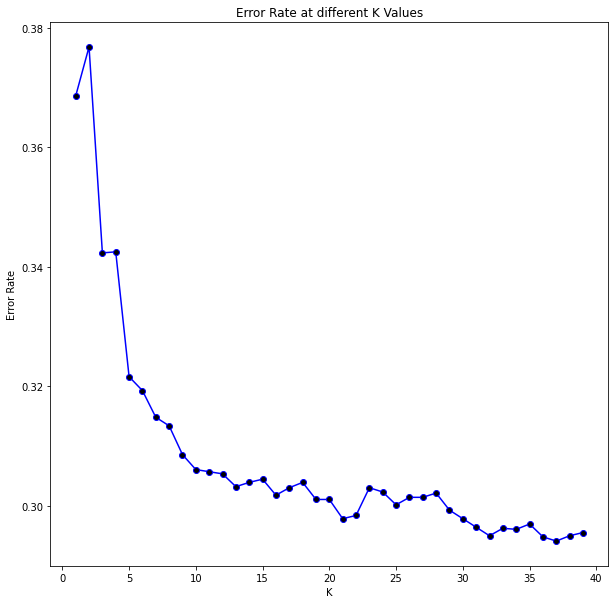

In [38]:
plt.figure(figsize=(10,10))
plt.plot(range(1,40),errorRates,color='blue',marker='o', markerfacecolor='black')
plt.title('Error Rate at different K Values')
plt.xlabel('K')
plt.ylabel('Error Rate')